In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")

In [3]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6447,6448,15614834,Long,619,Spain,Female,31,3,141751.82,1,0,1,61531.86,0
5063,5064,15592578,Nucci,614,Spain,Female,41,7,146997.64,2,0,0,137791.18,0
7307,7308,15782159,Ndubuagha,850,France,Male,28,8,67639.56,2,1,1,194245.29,0
2987,2988,15682268,Steere,676,Germany,Female,26,1,108348.66,1,0,0,60231.74,1
8233,8234,15589019,Morant,633,Spain,Female,33,4,92855.02,1,1,1,159813.18,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
print(f"Duplicated Value found: {df.duplicated().sum()}")

Duplicated Value found: 0


In [6]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [7]:
df.drop(columns = ["RowNumber", "CustomerId", "Surname"],inplace=True)

In [8]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6185,699,Germany,Male,36,6,147137.74,1,1,1,33687.90,0
3907,603,Germany,Male,46,4,98899.76,2,1,1,86190.34,0
8025,655,France,Male,24,9,107065.31,1,1,1,51959.82,0
6963,613,Spain,Male,39,8,118201.41,1,1,0,23315.59,0
1527,661,Germany,Male,35,8,124098.54,1,1,0,86678.48,0


In [9]:
df = pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True, dtype=int)

In [10]:
df.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
6525,728,34,4,106328.08,1,1,0,88680.65,0,0,0,1
9248,629,34,6,0.00,2,1,0,190347.72,0,0,1,1
1255,624,46,3,0.00,2,1,1,62825.03,0,0,1,1
6509,738,40,1,115409.18,2,0,0,180456.80,0,1,0,0
417,556,39,9,89588.35,1,1,1,94898.10,0,0,0,0


In [11]:
#split the dataset into training and testing set

X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

print("Dataset split into training and testing set")

Dataset split into training and testing set


In [12]:
#transform the X values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

X_train_trf
X_test_trf

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [13]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

2025-08-04 06:54:52.834603: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754290493.117545      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754290493.193442      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [14]:
#building model architecture

model = Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(6,activation='sigmoid'))
model.add(Dense(3,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-04 06:55:08.678414: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            21 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 229 (916.00 B)

 Trainable params: 229 (916.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
model_history = model.fit(X_train_trf,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4780 - loss: 0.6895 - val_accuracy: 0.7969 - val_loss: 0.5874
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7999 - loss: 0.5679 - val_accuracy: 0.7969 - val_loss: 0.5319
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7892 - loss: 0.5311 - val_accuracy: 0.7969 - val_loss: 0.5107
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7971 - loss: 0.5078 - val_accuracy: 0.7969 - val_loss: 0.5025
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8013 - loss: 0.4959 - val_accuracy: 0.7969 - val_loss: 0.4985
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7990 - loss: 0.4949 - val_accuracy: 0.7969 - val_loss: 0.4949
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7972 - loss: 0.4931 - val_accuracy: 0.7969 - val_loss: 0.4897
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7985 - loss: 0.4861 - val_accu

In [18]:
model.layers[0].get_weights()

[array([[-3.06496233e-01, -1.14439875e-01,  2.22512707e-01,
         -7.31906518e-02, -2.43226796e-01,  8.11411068e-02,
         -3.03547651e-01, -4.47252169e-02, -7.40861371e-02,
          6.34009093e-02, -6.82013184e-02],
        [ 1.91259885e+00,  2.16021609e+00,  5.48787951e-01,
         -2.08522248e+00,  2.58064938e+00,  4.96996164e-01,
          6.65544152e-01, -2.07252431e+00,  3.20824832e-01,
         -1.70285189e+00,  3.32435727e-01],
        [ 3.43136907e-01,  4.60290164e-03,  2.63031811e-01,
         -8.06050077e-02, -1.39944822e-01,  1.01411380e-01,
          7.94921368e-02,  3.38402033e-01,  4.73456159e-02,
         -1.26680076e-01,  7.18706772e-02],
        [ 1.97379827e-01, -3.23641270e-01, -6.46605849e-01,
         -6.74237490e-01, -3.16585571e-01, -5.81028819e-01,
         -1.22422941e-01,  2.74718493e-01, -2.28062272e-01,
         -6.70450509e-01, -9.36875939e-02],
        [-1.91551507e-01, -1.52731046e-01, -1.63967814e-02,
          2.00011373e-01,  5.03600575e-04,  

In [19]:
model.layers[1].get_weights()

[array([[-0.9917146 , -0.5203666 ,  0.6141562 ,  0.96298945, -0.2224908 ,
         -0.8195638 ],
        [-1.0996797 , -1.0288095 ,  0.14836752,  0.11038715, -0.7931991 ,
         -0.6212257 ],
        [ 0.85772336,  0.523448  , -0.6387674 , -0.49154988,  0.48714256,
          0.7159192 ],
        [ 0.44302464,  0.32672858,  0.06974576,  0.00845312,  0.12958981,
          0.5373685 ],
        [-0.39312845, -1.1909847 ,  0.9782231 ,  1.1900364 , -1.037636  ,
         -0.9897657 ],
        [ 0.06267921,  0.04395664, -0.40491152, -0.10166122,  0.13757883,
          0.15166904],
        [ 1.0573058 , -0.17904784, -1.0268679 , -0.96867764,  1.1024699 ,
          0.9969346 ],
        [ 0.07326908,  0.9234007 ,  0.04972882, -0.1073278 ,  0.83902735,
          0.397508  ],
        [ 0.9336263 ,  0.4601807 , -0.44069642, -1.1980648 ,  0.28117815,
          0.6747488 ],
        [-0.23244496,  0.7678563 ,  0.19069497, -0.19135877, -0.06900013,
         -0.20876968],
        [ 0.6270573 ,  0.22503

In [20]:
model.layers[2].get_weights()

[array([[-0.9544688 ,  0.70529026,  1.2249022 ],
        [-1.3378193 ,  1.4607623 ,  0.7823593 ],
        [ 0.99589854, -0.7979529 , -0.38249052],
        [ 1.0086057 , -1.7323952 , -1.396625  ],
        [-1.1482093 ,  1.0137328 ,  1.4069495 ],
        [-0.89458615,  0.731668  ,  0.82651335]], dtype=float32),
 array([ 0.58654183, -0.30873224, -0.7388393 ], dtype=float32)]

In [21]:
y_pred = model.predict(X_test_trf)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [22]:
y_pred_final = np.where(y_pred>0.5, 1, 0)

In [23]:
y_pred_final

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [24]:
from sklearn.metrics import accuracy_score
print(f"Accuracy Score: {accuracy_score(y_test,y_pred_final)}")

Accuracy Score: 0.8445


In [25]:
model_history.history

{'accuracy': [0.6681249737739563,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7964062690734863,
  0.7959374785423279,
  0.7970312237739563,
  0.8051562309265137,
  0.8101562261581421,
  0.8151562213897705,
  0.8154687285423279,
  0.8196874856948853,
  0.8217187523841858,
  0.8240625262260437,
  0.8231250047683716,
  0.8246874809265137,
  0.8253124952316284,
  0.8259375095367432,
  0.8253124952316284,
  0.8257812261581421,
  0.8271874785423279,
  0.8270312547683716,
  0.8267187476158142,
  0.8260937333106995,
  0.8268749713897705,
  0.8264062404632568,
  0.8259375095367432,
  0.8259375095367432

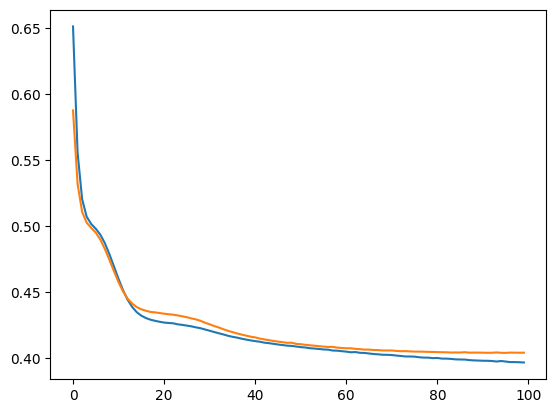

In [26]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])

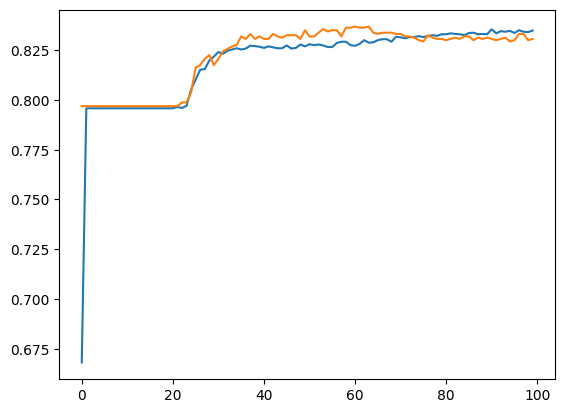

In [27]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])